# Predictive Analytics: Classification (Diabetic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats

from scipy.stats import kurtosis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Identifying the shape of the data frame
print(f'The diabetic training DataFrame has a total of: \n {df_train.shape[0]} rows\n {df_train.shape[1]} columns')

The diabetic training DataFrame has a total of: 
 614 rows
 10 columns


## Data Cleaning

In [4]:
df_train.head(10)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
5,152,4,114,65,0,0,21.9,0.432,37,0
6,173,2,87,0,23,0,28.9,0.773,25,0
7,276,2,100,70,52,57,40.5,0.677,25,0
8,624,0,94,70,27,115,43.5,0.347,21,0
9,443,4,117,64,27,120,33.2,0.230,24,0


### Missing Data

The grpah provide a quick visual for easy intepretation of missing data with a line graph.

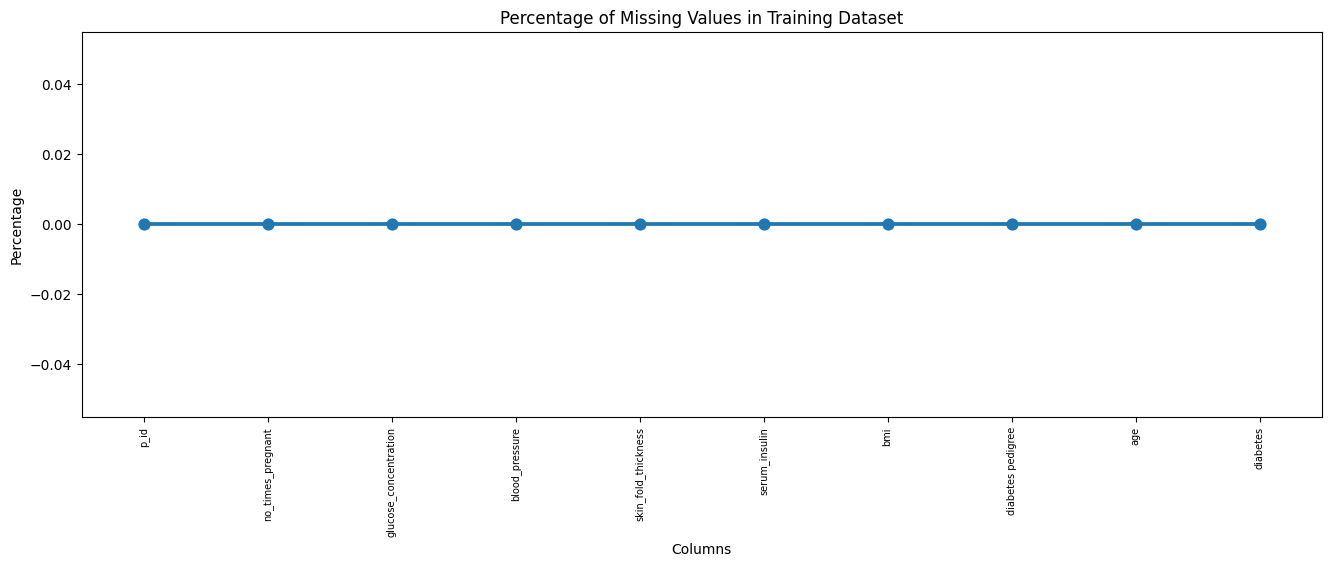

In [5]:
# Creation of new df to calculate percentage of missing data
missing = pd.DataFrame((df_train.isnull().sum()) * 100 / df_train.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Training Dataset")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

The table below provide a confirmation with no missing data in the dataset as all variable have 0% of missing value.

In [6]:
# Calculate Nan percent in each column
nan_percent_pa = (df_train.isna().sum() / len(df_train)) * 100


# Create a DataFrame from the series
nan_percent_pa_df = nan_percent_pa.reset_index()
nan_percent_pa_df.columns = ['Column', 'NaN_Percent']


# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_df = nan_percent_pa_df.sort_values(by='NaN_Percent', ascending=False)


# Print the top variable with missing data in the variable. Because there is 14 variable with missing data therefore only the top 14 is display.
nan_percent_df.head(5)

,Column,NaN_Percent
0,p_id,0.0
1,no_times_pregnant,0.0
2,glucose_concentration,0.0
3,blood_pressure,0.0
4,skin_fold_thickness,0.0


### Exploration of Data

In [7]:
df_train.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

## EDA

### Univariate Analysis

In [8]:
df_train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


Based on the count plot below, it can be seen that there is an imbalance in the target variable.

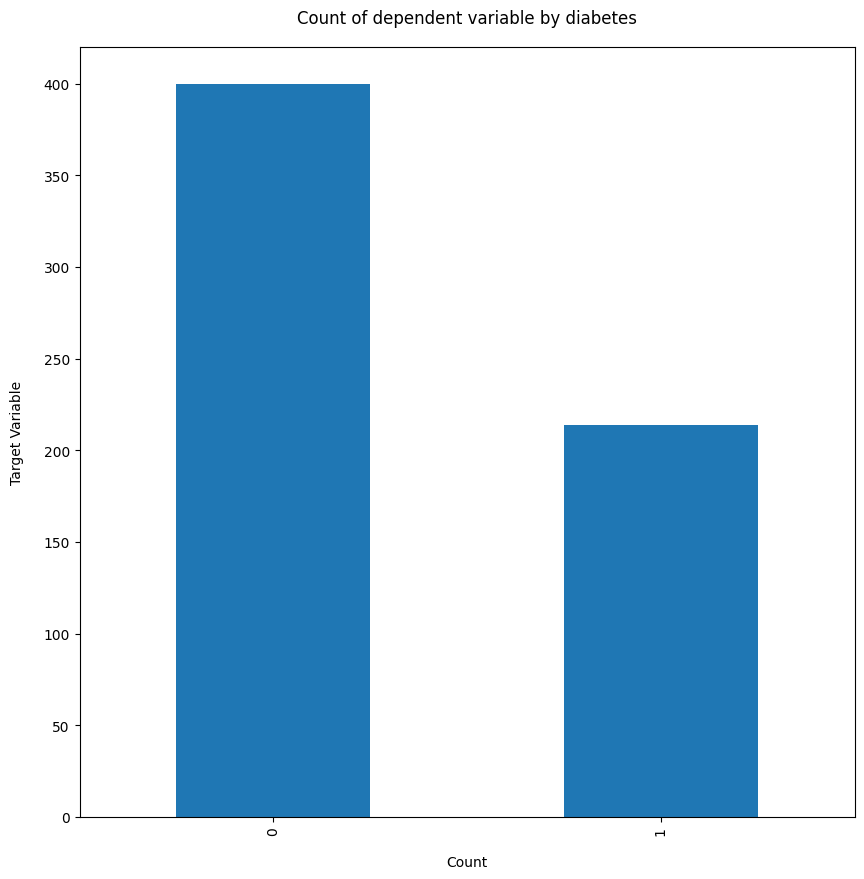

In [9]:
# Plot the variable in a horizontal bar chart to illustrate the imbalance data
df_train['diabetes'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of dependent variable by diabetes", y=1.02);

The pie chart below exhibit that 65% of the target variable are not diabetes and only 35% are diabetes.

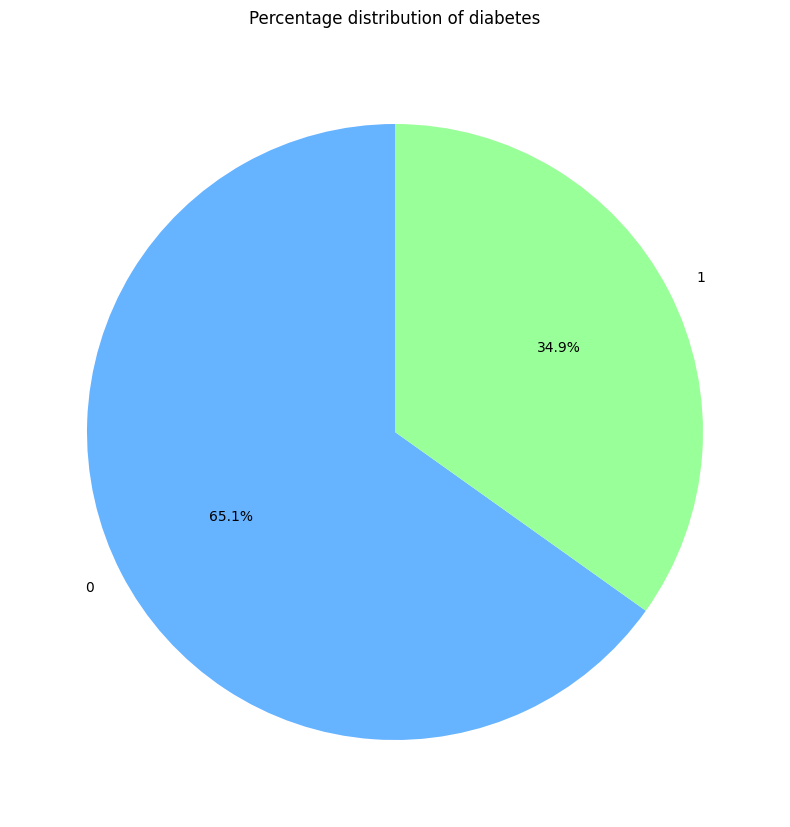

In [10]:
# Calculate the value counts
value_counts = df_train['diabetes'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])

# Customize the plot
plt.ylabel('')  # Remove the y-label
plt.title('Percentage distribution of diabetes', y=1.02)

# Show the plot
plt.show()


It can be seen that majority of the patient are on the younger spectrum therefore the sample is positively skew of 1.14. On the other hand, it has a kurtosis of 0.66 therefore exhibiting higher count of younger patient with diabetes suggesting moderate signifiacnt variation in data distribution.  

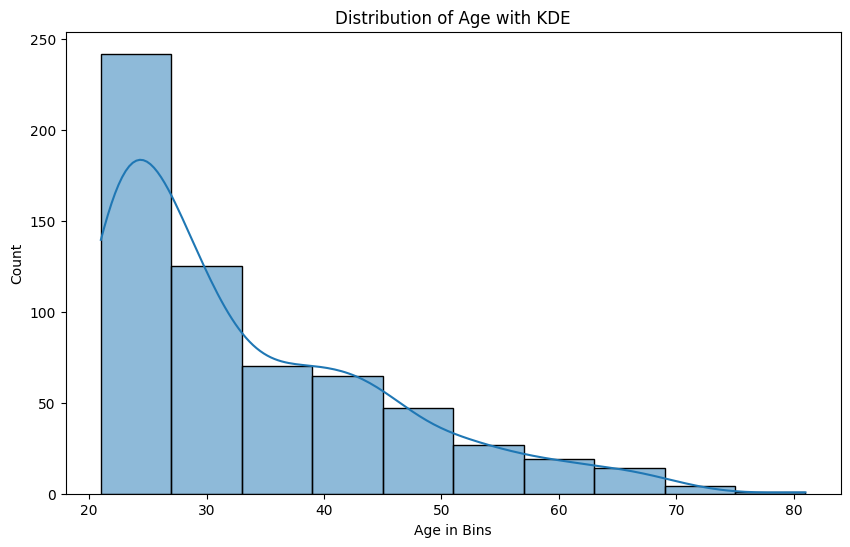

Skewness of Age: 1.14
Kurtosis of Age: 0.66


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['age'], bins=10, kde=True, edgecolor='k')  # Use sns.histplot with kde=True to include KDE
plt.xlabel('Age in Bins')
plt.ylabel('Count')
plt.title('Distribution of Age with KDE')
plt.show()

age_kurtosis = kurtosis(df_train['age']).round(2)
skewness_age = stats.skew(df_train['age']).round(2)


print(f'Skewness of Age: {skewness_age}')
print(f'Kurtosis of Age: {age_kurtosis}')

The distribution below shows that the sample are positively skew which highlight majority of the sample have not been pregnant.

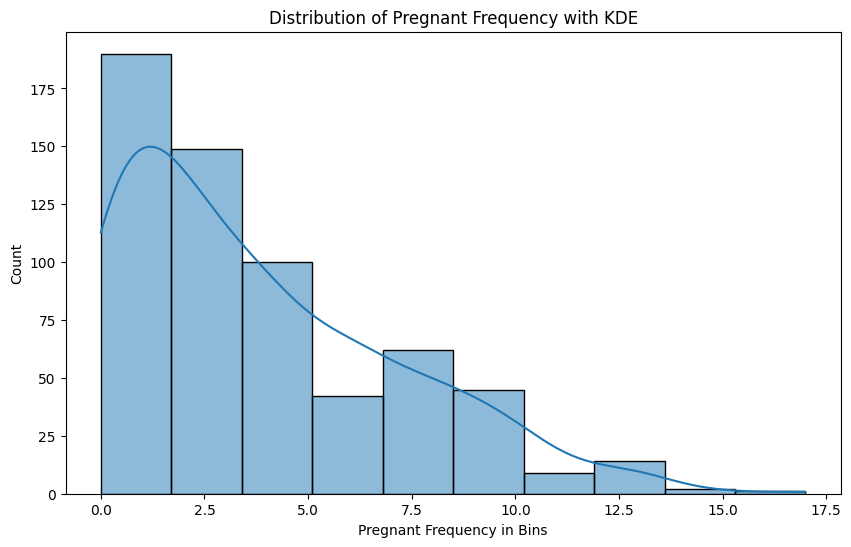

Skewness of time pregnant frequency: 0.9
Kurtosis of time pregnant frequency: 0.19


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['no_times_pregnant'], bins=10, kde=True, edgecolor='k')  # Use sns.histplot with kde=True to include KDE
plt.xlabel('Pregnant Frequency in Bins')
plt.ylabel('Count')
plt.title('Distribution of Pregnant Frequency with KDE')
plt.show()

kurtosis_p = kurtosis(df_train['no_times_pregnant']).round(2)
skewness_p = stats.skew(df_train['no_times_pregnant']).round(2)


print(f'Skewness of time pregnant frequency: {skewness_p}')
print(f'Kurtosis of time pregnant frequency: {kurtosis_p}')

The distribution below show that blood pressure is negatively skew and has a higher peak compare to a normal distribution.

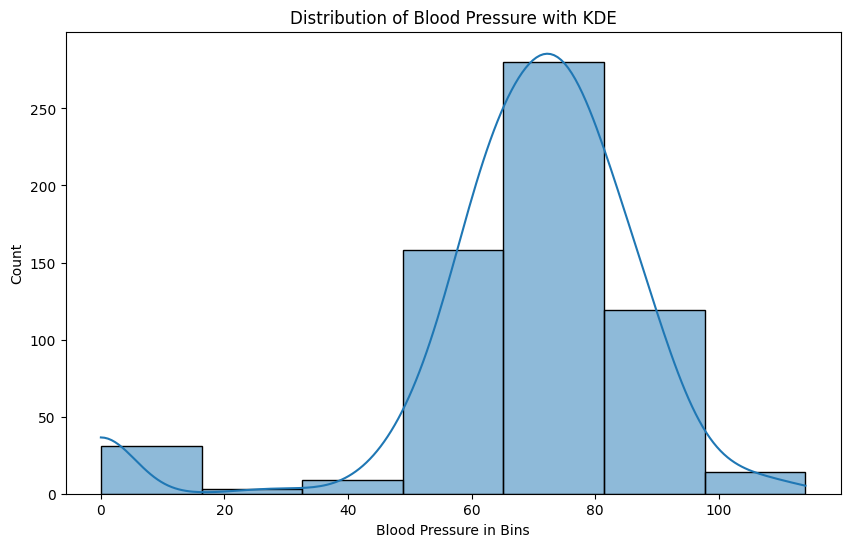

Skewness of blood pressure: -1.87
Kurtosis of blood pressure: 4.79


In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['blood_pressure'], bins=7, kde=True, edgecolor='k')
plt.xlabel('Blood Pressure in Bins')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure with KDE')
plt.show()

# Calculating kurtosis and skewness
blood_pressure_kurtosis = kurtosis(df_train['blood_pressure']).round(2)
blood_pressure_skewness = stats.skew(df_train['blood_pressure']).round(2)

# Printing the results
print(f'Skewness of blood pressure: {blood_pressure_skewness}')
print(f'Kurtosis of blood pressure: {blood_pressure_kurtosis}')

The histogram show that the distribution is positive skew and have a higher peak when compared to a normal distribution. 

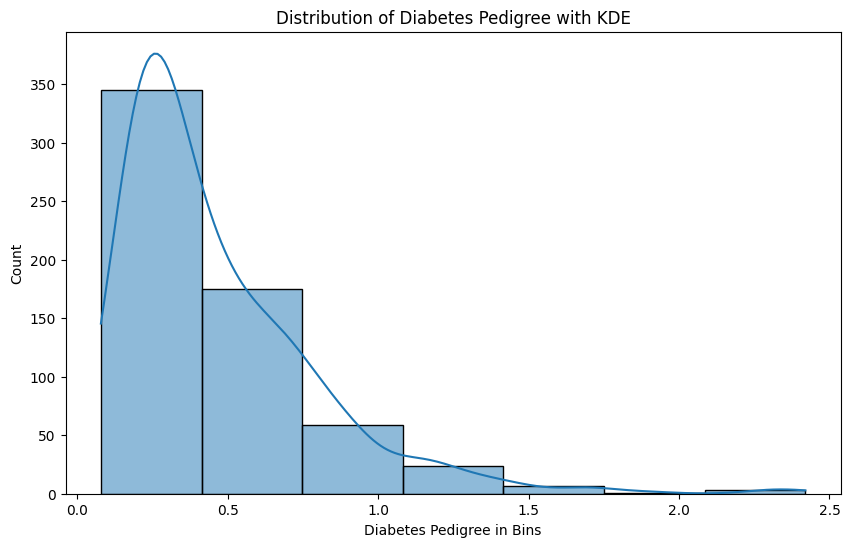

Skewness of diabetes pedigree: 1.97
Kurtosis of diabetes pedigree: 5.89


In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['diabetes pedigree'], bins=7, kde=True, edgecolor='k')
plt.xlabel('Diabetes Pedigree in Bins')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Pedigree with KDE')
plt.show()

# Calculating kurtosis and skewness
diabetes_pedigree_kurtosis = kurtosis(df_train['diabetes pedigree']).round(2)
diabetes_pedigree_skewness = stats.skew(df_train['diabetes pedigree']).round(2)

# Printing the results
print(f'Skewness of diabetes pedigree: {diabetes_pedigree_skewness}')
print(f'Kurtosis of diabetes pedigree: {diabetes_pedigree_kurtosis}')

### Bivariate Analysis

In [15]:
df_train

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


Based on the bivariate analysis below, it can be seen that diabetes has a correlation of 0.47 with diabates.

The boxplot exhibit the differences in quartile as patients who have diabetes tend to show higher glocose concentration.

In [16]:
correlation1 = df_train['diabetes'].corr(df_train['glucose_concentration']).round(2)
print(f'The correlation for between diabetes and glucose concentraion is {correlation1}')

The correlation for between diabetes and glucose concentraion is 0.47


C:\Users\Sam\AppData\Local\Temp\ipykernel_20056\4205437910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='glucose_concentration', data=df_train, palette='husl')


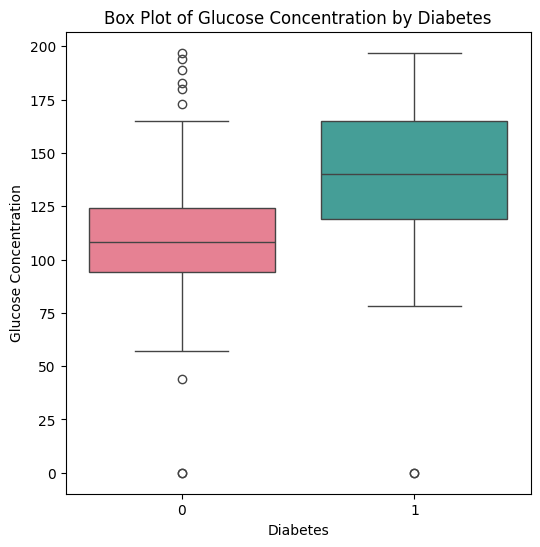

In [17]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='diabetes', y='glucose_concentration', data=df_train, palette='husl')
plt.xlabel('Diabetes')
plt.ylabel('Glucose Concentration')
plt.title('Box Plot of Glucose Concentration by Diabetes')
plt.show()

In [18]:
correlation2 = df_train['diabetes'].corr(df_train['blood_pressure']).round(2)
correlation3 = df_train['glucose_concentration'].corr(df_train['blood_pressure']).round(2)
print(f'The correlation for between Diabetes and Blood Pressure is {correlation2}')
print(f'The correlation for between Glucose Concentration and Blood Pressure is {correlation3}')

The correlation for between Diabetes and Blood Pressure is 0.07
The correlation for between Glucose Concentration and Blood Pressure is 0.16


As seen below, the scatter plot does exhibit an overlapping cluster form between diabtes and non-diabates patients.

Patients which higher amount of glucose concentration tend to be diabetes, introducing an additional variable which is blood pressure does show some insight.

It could be seen that patients with blood pressure ranging from 40 - 100 are susceptible to diabetes, given that the glucose concentration exceed a certain threshold which is 125. Moreover, there is a slight distinction within the scatter plot where patients blood pressure exceeding 60 are more likely to be diabetes. Although the blood pressure does not have a high correlation with diabetes, it has a 0.16 correlation when compared with glucose concentration therefore it could be seen as a additional factors to screen patients. 


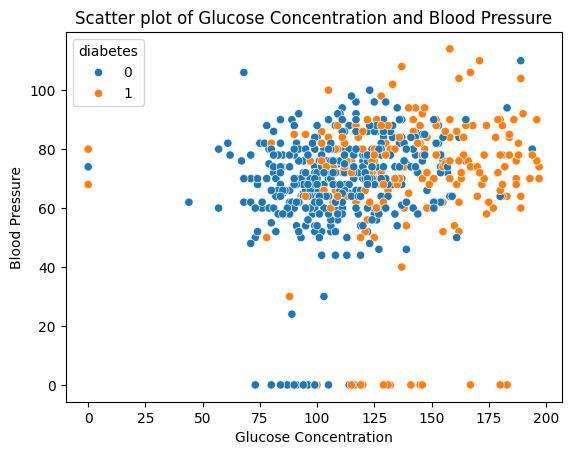

In [19]:
sns.scatterplot(x='glucose_concentration',y='blood_pressure', data= df_train, hue = 'diabetes')
plt.xlabel('Glucose Concentration')
plt.ylabel('Blood Pressure')
plt.title('Scatter plot of Glucose Concentration and Blood Pressure')
plt.show()

### Multivariate Analysis

Based on the heatmap below, it provide the correlation of all variable.

To provide easy understand, filtering the variable down into target varibale would be better.

In [20]:
df_correlation = df_train.drop(columns='p_id')
df_correlation = df_correlation.rename(columns={'no_times_pregnant': 'No of time Pregnant',
                                                'glucose_concentration': 'Glucose Concentration',
                                                'blood_pressure': 'Blood Pressure',
                                                'skin_fold_thickness': 'Skin Fold Thickness',
                                                'serum_insulin': 'Serum Insulin',
                                                'bmi':'BMI',
                                                'diabetes pedigree':'Diabetes Pedigree',
                                                'age':'Age',
                                                'diabetes':'Diabetes'})

<Axes: >

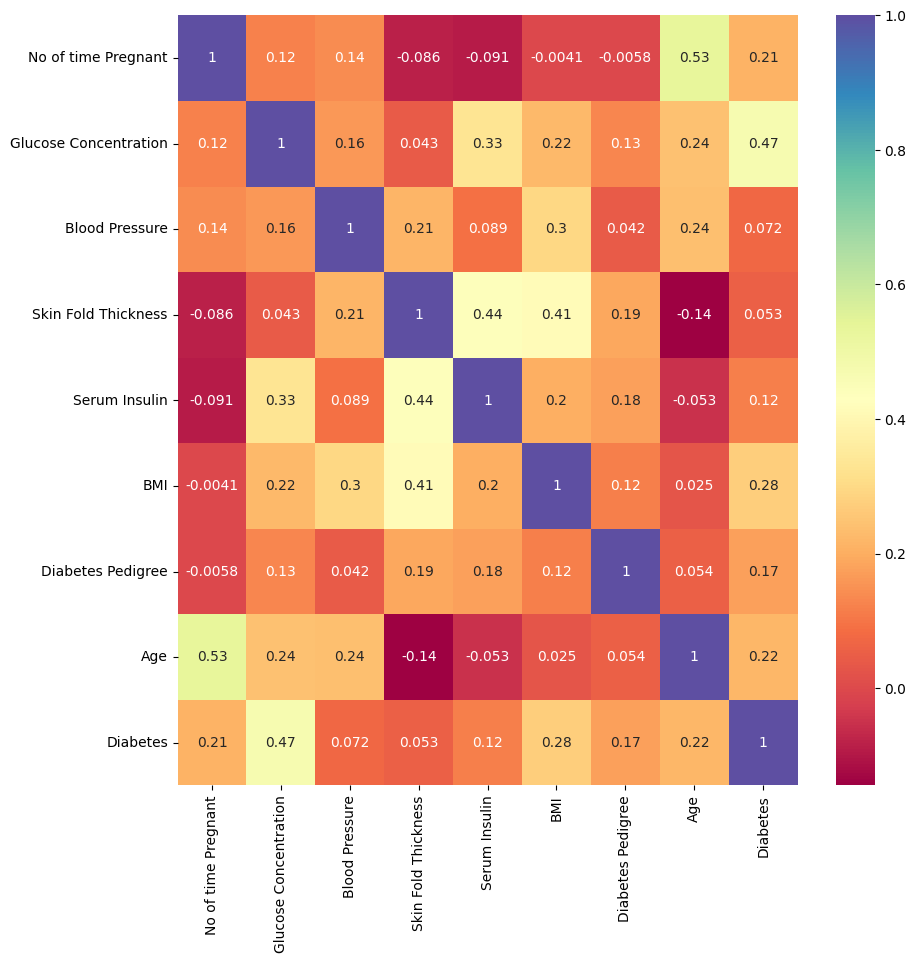

In [21]:
# Heatmap for correlation
correlation_matrix = df_correlation.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data = correlation_matrix, cmap = 'Spectral', annot = True)

The bar chart below would be focus analysis on the dependent variable to the other independent variable. 

Based on the bar chart, it could be seen that Glucose Concentration has the highest correlation with diabetes. 

In this scenario, to build an initial model, the top 5 variable could be selected as the independent variable for the initial model as the remaining variable average around 20% and the lowest which is diabetes pedigree which only have a correlation of 0.17.

In [22]:
df_correlation1 = df_train.drop(columns='p_id')
df_correlation1 = df_correlation1.rename(columns={'no_times_pregnant': 'NoP',
                                                'glucose_concentration': 'GC',
                                                'blood_pressure': 'BP',
                                                'skin_fold_thickness': 'SKT',
                                                'serum_insulin': 'SI',
                                                'bmi':'BMI',
                                                'diabetes pedigree':'DP',
                                                'age':'Age',
                                                'diabetes':'Diabetes'})

C:\Users\Sam\AppData\Local\Temp\ipykernel_20056\2825714477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sorted_correlation, palette = 'Set2')


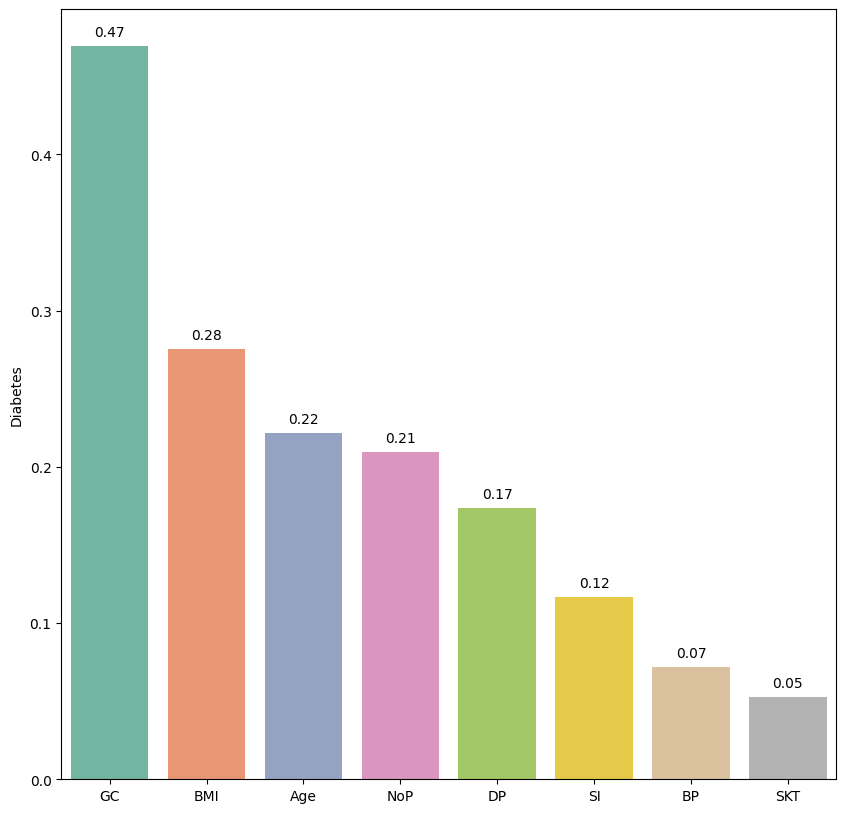

In [23]:
# Heatmap for correlation
correlation_matrix = df_correlation1.corr()['Diabetes'].drop('Diabetes')
sorted_correlation = correlation_matrix.sort_values(ascending=False)
sorted_correlation = pd.Series(sorted_correlation)
plt.figure(figsize=(10, 10))
ax = sns.barplot(data = sorted_correlation, palette = 'Set2')
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.2f'),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=10)

## Machine Learning Model

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [25]:
# Preparaing the x and y (dependent variable)
# To prepare independent variable, the id and the dependent variable is remove
x = df_train.drop(['p_id', 'diabetes'], axis=1)

# Only collect the depenedent values
y = df_train.diabetes.values

In [26]:
# Check the df
x

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27
...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59
610,1,84,64,23,115,36.9,0.471,28
611,2,92,52,0,0,30.1,0.141,22
612,0,125,96,0,0,22.5,0.262,21


In [27]:
# Check the column
x.columns

Index(['no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age'],
      dtype='object')

In [28]:
# Check the dependent values
y

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [29]:
# Splitting the data into training & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [30]:
len(x_train)

491

In [31]:
len(x_test)

123

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler


# Import the standard scaler
sc = StandardScaler()


# Standardizing  all the dependent variable 
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [33]:
x_train_sc

array([[ 1.48960204,  1.16739201,  0.85520193, ..., -0.86049741,
        -0.70732787,  1.67249461],
       [ 0.61157731, -0.58679683, -0.14863299, ..., -0.92305727,
        -0.65063201, -0.37494737],
       [-0.55912233,  0.60472766,  0.30309272, ..., -0.76040165,
        -0.89531943, -0.37494737],
       ...,
       [ 0.02622749,  0.33994444, -0.0482495 , ...,  0.17799616,
        -0.91620738, -0.46025745],
       [-0.55912233, -0.61989473,  0.85520193, ...,  1.72948054,
        -1.01467915, -0.88680787],
       [ 0.61157731, -0.95087375,  1.1563524 , ..., -1.47358398,
        -0.83265558, -0.46025745]])

In [34]:
x_test_sc

array([[ 1.78227695,  0.14135703,  0.05213399,  0.39675795,  0.27066018,
        -0.07224325, -0.7819277 ,  0.64877362],
       [ 0.02622749, -0.2227199 , -0.19882474, -1.25469688, -0.65821765,
        -1.22334457, -0.1045613 ,  0.30753329],
       [-0.85179725, -0.42130731, -0.44978347,  1.66710781,  0.77952368,
         0.47828346, -0.15528918, -0.80149778],
       [-0.55912233, -0.68609053, -0.0482495 ,  0.33324045, -0.08473656,
         0.85364259, -0.42683254, -0.63087762],
       [-1.14447216, -1.21565697,  0.65443494,  0.71434541,  0.35143216,
         0.81610667, -0.6983759 , -0.88680787],
       [-0.85179725, -1.14946117, -0.14863299,  2.04821277, -0.13319975,
         1.20397777,  1.34267527, -0.37494737],
       [ 0.02622749, -1.48044019, -0.34939997, -1.25469688, -0.65821765,
         0.2906039 , -0.22690501, -0.7161877 ],
       [-0.26644742, -0.02413248,  0.05213399,  0.65082792,  0.43220414,
         1.4041693 , -0.04488144, -0.28963729],
       [-0.85179725,  1.0680983 

### kNN Classifier

In [35]:
# Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initiating the classifier
model = KNeighborsClassifier()

# Passing the data to classifier
model.fit(x_train_sc, y_train)

KNeighborsClassifier()

In [36]:
# The model predict
y_pred = model.predict(x_test_sc)

In [37]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [38]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [39]:
# Classification metrics 
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,y_pred)*100)

78.86178861788618
79.41176470588235
58.69565217391305
67.5


### Decision Tree Classifier

In [40]:
# Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt = DecisionTreeClassifier()

# Passing the data to classifier
model_dt.fit(x_train_sc, y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt = model_dt.predict(x_test_sc)

In [42]:
# Classification metrics
print(accuracy_score(y_test,y_pred_dt)*100)
print(precision_score(y_test,y_pred_dt)*100)
print(recall_score(y_test,y_pred_dt)*100)
print(f1_score(y_test,y_pred_dt)*100)

76.42276422764228
68.88888888888889
67.3913043478261
68.13186813186813


### Random Forest Classifier

In [43]:
# Call the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initiating the classifier
model_rf = RandomForestClassifier(n_estimators=200)

# Passing the data to classifier
model_rf.fit(x_train_sc, y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
y_pred_rf = model_rf.predict(x_test_sc)

In [45]:
# Classification metrics 
print(accuracy_score(y_test,y_pred_rf)*100)
print(precision_score(y_test,y_pred_rf)*100)
print(recall_score(y_test,y_pred_rf)*100)
print(f1_score(y_test,y_pred_rf)*100)

76.42276422764228
74.28571428571429
56.52173913043478
64.19753086419753


### AdaBoost

In [46]:
# Call the AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Initiating the classifier
model_ada = AdaBoostClassifier(n_estimators=100)

# Passing the data to classifier
model_ada.fit(x_train_sc, y_train)

c:\Users\Sam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [47]:
y_pred_ada = model_ada.predict(x_test_sc)

In [48]:
# Classification metrics 
print(accuracy_score(y_test,y_pred_ada)*100)
print(precision_score(y_test,y_pred_ada)*100)
print(recall_score(y_test,y_pred_ada)*100)
print(f1_score(y_test,y_pred_ada)*100)

77.23577235772358
73.68421052631578
60.86956521739131
66.66666666666666


### Test Set

In [49]:
df_test.drop(columns='p_id', inplace=True)

In [50]:
# Random Forest Algo was used
data_sc = sc.transform(df_test)

prediction = model_rf.predict(data_sc)

print(prediction)

[1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 1]


## Conclusion

Based on the finding, the Random Forest (RF) Algorithm have the highest overall metric when compared to the other algorithms. Therefore the RF algorithm was used for the test set.

In addition, please be aware that every time the code run, the metric does not remain the same. The result below was from running the code during the author report writing.


The finding are shown below:

| Algorithms    | Accuracy      | Percision      | Recall         |   F1           |
| ------------- |:-------------:| :-------------:| :-------------:| :-------------:| 
| Random Forest | 76.42%        | 78.38%         | 58.00%         | 66.67%         | 
| AdaBoost      | 70.73%        | 65.90%         | 58.00%         | 61.70%         | 
| KNN           | 73.98%        | 78.13%         | 50.00%         | 60.98%         | 
| Decision Tree | 63.41%        | 56.09%         | 46.00%         | 50.55%         | 